In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
from pathlib import Path
output_dir = Path('../output/1231_105015/')
oof0 = pd.read_csv(output_dir / 'oof_fold0.csv')
oof0.head()

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max,data_type,rank_0,rank_1,...,rank_16,rank_17,rank_18,rank_19,rank_20,rank_21,rank_22,rank_23,ranking,top_id
0,007f87ba2,12,1,39.1360,562.50,42.2720,3281.25,tp,4,21,...,6,22,10,20,7,17,19,15,3,8
1,0151b7d20,1,1,46.0320,3843.75,46.9280,5625.00,tp,1,13,...,23,19,0,18,12,5,17,20,0,18
2,02b9a8ab9,12,1,33.9093,562.50,37.0453,3281.25,tp,12,3,...,22,21,10,14,15,11,17,19,0,3
3,04975ecd8,19,1,54.3840,281.25,55.9360,2812.50,tp,19,7,...,2,9,22,0,21,4,18,12,0,19
4,053aeb7bd,23,4,0.9520,6459.96,8.8758,11627.90,tp,23,5,...,22,15,11,14,10,17,20,6,0,6


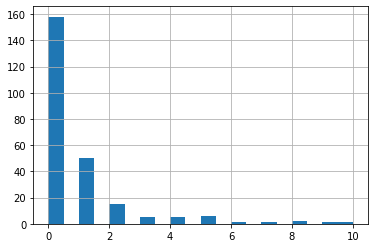

In [71]:
oof0['ranking'].hist(bins=20)

## 各種の予測のrankingを可視化(小さい方がいい)

In [72]:
oof0

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max,data_type,rank_0,rank_1,...,rank_16,rank_17,rank_18,rank_19,rank_20,rank_21,rank_22,rank_23,ranking,top_id
0,007f87ba2,12,1,39.1360,562.50,42.2720,3281.25,tp,4,21,...,6,22,10,20,7,17,19,15,3,8
1,0151b7d20,1,1,46.0320,3843.75,46.9280,5625.00,tp,1,13,...,23,19,0,18,12,5,17,20,0,18
2,02b9a8ab9,12,1,33.9093,562.50,37.0453,3281.25,tp,12,3,...,22,21,10,14,15,11,17,19,0,3
3,04975ecd8,19,1,54.3840,281.25,55.9360,2812.50,tp,19,7,...,2,9,22,0,21,4,18,12,0,19
4,053aeb7bd,23,4,0.9520,6459.96,8.8758,11627.90,tp,23,5,...,22,15,11,14,10,17,20,6,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,fa0eee1e4,8,1,39.0347,3750.00,43.1573,5531.25,tp,21,8,...,6,5,9,10,17,22,20,15,1,15
241,fc6609050,0,1,42.9973,5906.25,43.7920,8250.00,tp,0,8,...,6,14,19,22,16,17,7,11,0,0
242,fc6c3b488,21,1,42.3467,3281.25,43.4400,4125.00,tp,14,21,...,16,5,22,17,0,20,12,15,1,20
243,fd1970634,2,1,55.4987,468.75,57.2747,3000.00,tp,2,15,...,19,8,9,10,23,20,11,17,0,8


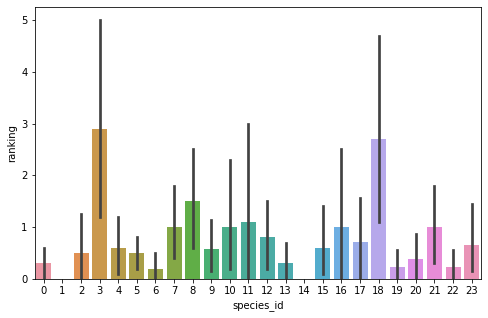

In [73]:
fig = plt.figure(figsize=(8, 5))
sns.barplot(x='species_id', y='ranking', data=oof0)

3, 18が特に分類できていない


## rankingの結果が悪いもの(値が大きいもの)を可視化

In [74]:
rank_columns = [f'rank_{i}' for i in range(24)]
bad_result = oof0[oof0['ranking'] >= 4].copy()
bad_result = bad_result.drop(rank_columns, axis=1).reset_index(drop=True)
bad_result

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max,data_type,ranking,top_id
0,055d22517,10,1,47.5835,947.461,50.0274,10852.70,tp,6,20
1,178b835e3,16,4,21.2267,3093.750,23.0613,4593.75,tp,5,11
2,178b835e3,16,4,4.2560,3093.750,6.0907,4593.75,tp,5,11
3,27c146a88,17,4,26.7733,1312.500,29.3067,7406.25,tp,5,21
4,4bb6b8a81,18,1,36.4053,3187.500,37.0987,5062.50,tp,8,19
5,534b6a4a0,3,1,8.8747,1031.250,9.6160,2812.50,tp,5,9
6,551385b05,11,1,33.9534,1808.790,35.0912,5684.77,tp,9,23
7,581d07559,3,1,9.4293,1031.250,10.1707,2812.50,tp,4,0
8,5840c2d77,7,1,44.6240,4687.500,47.7653,11437.50,tp,4,20
9,b9f3581d5,18,1,58.5333,3187.500,59.2267,5062.50,tp,8,1


In [75]:
species_id = [i for i in range(24)]
df = pd.DataFrame(columns=species_id, index=species_id)
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
for _, raw in bad_result.iterrows():
    speceis_id = raw['species_id'].values[0]
    top_id = raw['top_id'].values[0]
    df[species_id, top_id] 

nan

In [ ]:
for i in range(24):
    for j in range(24):
        bad_result
        df[i, j]

In [57]:
oof0['songtype_id'].value_counts()

1    218
4     27
Name: songtype_id, dtype: int64

songtype=4の音声は3/16(18%)が間違っている  
全体は16/245で約6%が間違い    
割合的にはそこまで多くない?   

16(song_type=4)を11と間違えている
3(song_type=1)を9と間違えている